In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

# Import data with Pandas

In [4]:
athlete_events = pd.read_csv("athlete_events.csv")
noc_regions    = pd.read_csv("noc_regions.csv")

# Look at the athlete database

In [5]:
athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
noc_regions

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [8]:
# Replace NOC regions with country name
pysqldf(
"""
SELECT  NOC,
        CASE WHEN notes is NOT NULL THEN notes
        ELSE region
        END
        AS Country
FROM noc_regions
AS noc_country
""")

,NOC,Country
0,AFG,Afghanistan
1,AHO,Netherlands Antilles
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra
...,...,...
225,YEM,Yemen
226,YMD,South Yemen
227,YUG,Yugoslavia
228,ZAM,Zambia


In [9]:
# Remove possible repeats and replace NOC code with country, and remove art competitions
athlete_events_filtered = pysqldf ("""
SELECT
    *
FROM
    athlete_events
    
LEFT JOIN
    (SELECT  NOC,
            CASE WHEN notes is NOT NULL THEN notes
            ELSE region
            END
            AS Country
    FROM noc_regions)
AS noc_country
    
ON noc_country.NOC = athlete_events.NOC

WHERE
    Sport <> "Art Competitions"

GROUP BY
    ID,
    Games,
    Event,
    Medal
""")


Text(0, 0.5, 'Number of athletes')

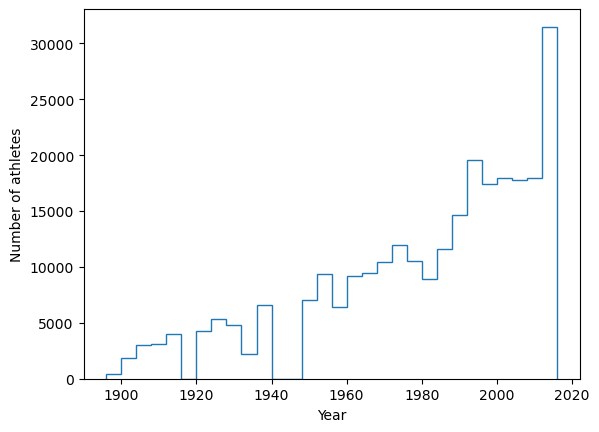

In [10]:
plt.hist(athlete_events_filtered['Year'], bins = 30, histtype = 'step')
plt.xlabel('Year')
plt.ylabel('Number of athletes')

In [11]:
pysqldf("""
SELECT
    MIN (Year) AS earliest_year,
    MAX (Year) AS latest_year
FROM (
    SELECT
        *
    FROM
        athlete_events
    GROUP BY
        ID,
        Games,
        Event,
        Medal
    )
""")

,earliest_year,latest_year
0,1896,2016


In [12]:
pysqldf('SELECT ID, COUNT(*) FROM athlete_events GROUP BY ID ORDER BY COUNT(*) DESC')

,ID,COUNT(*)
0,77710,58
1,106296,39
2,115354,38
3,119591,36
4,129196,32
...,...,...
135566,9,1
135567,4,1
135568,3,1
135569,2,1


(array([222552.,  48564.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

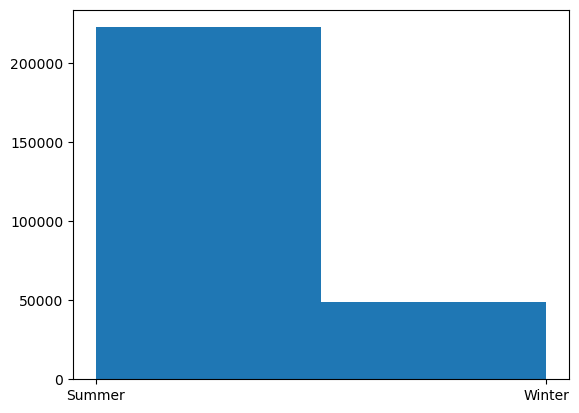

In [13]:
plt.hist(athlete_events['Season'], bins = 2)

** Distinct sports**

In [14]:
athletes_by_sport = pysqldf(
"""
SELECT
    Sport,
    COUNT(*) AS number_of_athletes
FROM
    athlete_events
GROUP BY
    Sport
ORDER BY COUNT(*) DESC
""")

print (athletes_by_sport.to_string())

                        Sport  number_of_athletes
0                   Athletics               38624
1                  Gymnastics               26707
2                    Swimming               23195
3                    Shooting               11448
4                     Cycling               10859
5                     Fencing               10735
6                      Rowing               10595
7        Cross Country Skiing                9133
8               Alpine Skiing                8829
9                   Wrestling                7154
10                   Football                6745
11                    Sailing                6586
12              Equestrianism                6344
13                   Canoeing                6171
14                     Boxing                6047
15              Speed Skating                5613
16                 Ice Hockey                5516
17                     Hockey                5417
18                   Biathlon                4893


# Cleaning data:

We must remove:  
Repeated values  
Art competitions

We must create:  
2 subtables, one for male and one for female athletes  
We must be careful about the cleanliness of data. Some sports have a lot more athletes than others.

# Questions:

Correlation between height and weight in some sports, such as rowing, swimming, cycling, etc, and within categories in athletics. This might be useful for coaches in those sports when selecting youth athletes based on anthropometric potential. We could also look at these, for each sport, depending on medal.
We could also study these averages across sports, and for each sport across time. This will allow us to make a comparative analysis between them and see how these characteristics change over time.

# Hypotheses

Some sports, like basketball, will have significantly larger than average heights, and medalists will be taller than average.
Given the improvement in training methods and the average human height, we expect recent events to have taller athletes.


In [22]:
from pandaserd import ERD
erd = ERD()

t1 = erd.add_table(athlete_events, 'Athlete_events', bg_color='pink')
t2 = erd.add_table(noc_regions, 'NOC_regions', bg_color='skyblue')
erd.create_rel('Athlete_events', 'NOC_regions', left_on='NOC', right_on = 'NOC', left_cardinality = '*', right_cardinality='+')

erd.write_to_file('erd.txt')

written to erd.txt; visit https://edotor.net/ to render ERD


In [20]:
import pandas as pd
from pandaserd import ERD

df1 = pd.DataFrame(data=[[123, 32, '1 Ottawa Street'], [123, 80, '14 Canada Road']])
df1.columns = ['PERSON', 'AGE', 'ADDRESS']
df2 = pd.DataFrame(data=[[6342, 124123124124, '1992-01-02', 21, 'K012V4'], [3124, 154823124124, '1984-02-02',42,'L4Y6S2']])
df2.columns = ['PERSON', 'CREDIT_CARD', 'DOB', 'PERSON_AGE', 'POSTAL_CODE']

erd = ERD()
t1 = erd.add_table(df1, 'PERSON', bg_color='pink')
t2 = erd.add_table(df2, 'CREDIT_CARD', bg_color='skyblue')
erd.create_rel('PERSON', 'CREDIT_CARD', on='PERSON', right_cardinality='*')
#erd.create_rel('PERSON', 'CREDIT_CARD', left_on='AGE', right_on='PERSON_AGE', left_cardinality='+', right_cardinality='+')

erd.write_to_file('output.txt')

written to output.txt; visit https://edotor.net/ to render ERD
